In [ ]:
# imports and install

!pip install git+https://github.com/raghakot/keras-vis.git -U
!pip install scipy==1.1.0
!pip install keras-vis
!pip install keras==2.2.2
!pip install tensorflow==1.15
!pip install keras_applications==1.0.7

import os
import keras
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import img_to_array, load_img
from keras import backend as K
from keras import activations
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from vis.visualization import visualize_saliency,visualize_activation
from vis.utils import utils
import scipy.ndimage as ndimage
import warnings
warnings.filterwarnings("ignore")

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-ivr1dkp9
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-ivr1dkp9
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38899 sha256=a985ff13a7a932dcd6a00f7be00ad9e1ba3f2b84bba532020eca95038b260b5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-47m06yf_/wheels/09/c1/10/1bc85a53a0eb5c3d760dece6962c5061addaaea9286f0248a4
Successfully built keras-vis
  Attempting uninstall: keras-vis
    Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1
     |████████████████████████████████| 31.2 MB 60 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

Using TensorFlow backend.


In [ ]:
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Mounted at /content/GDrive/
Connection to Google drive successful


In [30]:
data = []
labels = []
for img in human_data:
    try:
        img_read = plt.imread('/content/GDrive/My Drive/dataset1/humanity/human' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in nonhuman_data:
    try:
        img_read = plt.imread('/content/GDrive/My Drive/dataset1/humanity/non-human' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None
        

In [32]:
image_data = np.array(data)
labels = np.array(labels)

In [33]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [37]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
Y_train = np_utils.to_categorical(Y_train, num_classes = 2)
Y_test = np_utils.to_categorical(Y_test, num_classes = 2)

In [39]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [25]:
X = np.array(X).reshape(-1, 288, 432, 3)
X = X.astype('float32')
X = X / 255.
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

ValueError: ignored

In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [ ]:
human_data = os.listdir('/content/GDrive/My Drive/dataset1/humanity/human')
print(human_data[:10]) #the output we get are the .png files

nonhuman_data = os.listdir('/content/GDrive/My Drive/dataset1/humanity/non-human')
print('\n')
print(nonhuman_data[:10])

['4_2_5.png', '3_2_4.png', '1_5_3.png', '3_6_1.png', '2_5_4.png', '2_2_3.png', '1_2_2.png', '4_1_6.png', '2_3_3.png', '4_3_7.png']


['9_2_6.png', '9_5_42.png', '9_1_1.png', '7_2_42.png', '11_1_4.png', '12_3_22.png', '12_5_6.png', '13_4_53.png', '6_3_62.png', '10_4_22.png']


In [ ]:
data = []
labels = []
for img in human_data:
    try:
        img_read = plt.imread('/content/GDrive/My Drive/dataset1/humanity/human' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in nonhuman_data:
    try:
        img_read = plt.imread('/content/GDrive/My Drive/dataset1/humanity/non-human' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

ValueError: ignored

In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [12]:
Y_train = np_utils.to_categorical(Y_train, num_classes = 2)
Y_test = np_utils.to_categorical(Y_test, num_classes = 2)

In [41]:
# model
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3), name='layer_1'))
model.add(MaxPooling2D((2, 2), name='layer_2'))
model.add(Dropout(0.25, name='layer_3'))
model.add(Conv2D(64, (3, 3), activation='relu', name='layer_4'))
model.add(MaxPooling2D((2, 2), name='layer_5'))
model.add(Dropout(0.25, name='layer_6'))
model.add(Conv2D(64, (3, 3), activation='relu', name='layer_7'))
model.add(Flatten(name='layer_8'))
model.add(Dense(64, activation='relu', name='layer_9'))
model.add(Dense(3, activation='softmax', name='visualized_layer'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 48, 48, 32)        896       
_________________________________________________________________
layer_2 (MaxPooling2D)       (None, 24, 24, 32)        0         
_________________________________________________________________
layer_3 (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 22, 22, 64)        18496     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 11, 11, 64)        0         
_________________________________________________________________
layer_6 (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
layer_7 (Conv2D)             (None, 9, 9, 64)          36928     
__________

In [42]:
# compile model
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(Y_train), epochs=5, 
                    validation_data=(np.array(X_test), np.array(Y_test)))

Train on 311 samples, validate on 78 samples
Epoch 1/5
311/311 [==============================] - 2s 6ms/step - loss: 0.7510 - acc: 0.9100 - val_loss: 0.6925 - val_acc: 1.0000
Epoch 2/5
311/311 [==============================] - 1s 4ms/step - loss: 0.6994 - acc: 1.0000 - val_loss: 0.6925 - val_acc: 1.0000
Epoch 3/5
311/311 [==============================] - 1s 4ms/step - loss: 0.6994 - acc: 1.0000 - val_loss: 0.6925 - val_acc: 1.0000
Epoch 4/5
311/311 [==============================] - 1s 4ms/step - loss: 0.6994 - acc: 1.0000 - val_loss: 0.6925 - val_acc: 1.0000
Epoch 5/5
311/311 [==============================] - 1s 4ms/step - loss: 0.6994 - acc: 1.0000 - val_loss: 0.6925 - val_acc: 1.0000


In [43]:
score = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
model.save("2dCNN.h5")

acc: 100.00%


In [44]:
# Find the index of the to be visualized layer above
layer_index = utils.find_layer_idx(model, 'visualized_layer')

# Swap softmax with linear
model.layers[layer_index].activation = activations.linear

In [49]:
# serialize model to JSON
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

print("Saved model to disk")
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model score
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk


IndexError: ignored

[1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2]


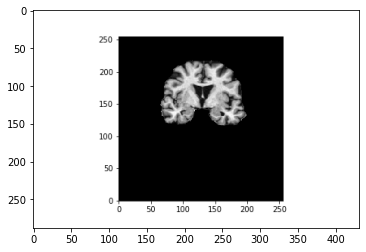

In [ ]:
# original image
test_img = X_test[52]
plt.imshow(test_img)
print(Y_test)

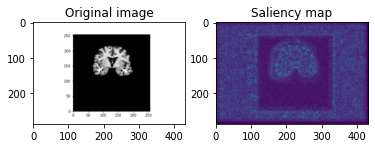

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# Matplotlib preparations
fig, axes = plt.subplots(1, 2)
plt.figure(figsize=(15,15))

# Generate visualization
visualization = visualize_saliency(loaded_model, layer_index, filter_indices=None, seed_input=test_img, backprop_modifier=None)
axes[0].imshow(test_img) 
axes[0].set_title('Original image')
axes[1].imshow(visualization)
axes[1].set_title('Saliency map')
plt.show()

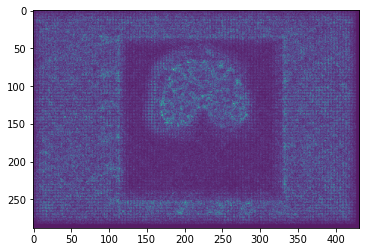

In [ ]:
grads = visualize_saliency(loaded_model, layer_index, filter_indices=None,
                          seed_input=test_img, backprop_modifier=None)
plt.imshow(grads, alpha=0.9)

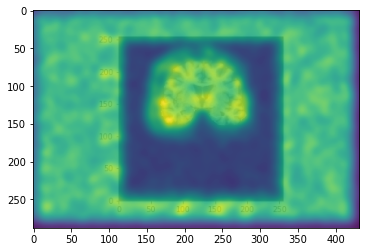

In [ ]:
gaus = ndimage.filters.gaussian_filter(grads[:,:], sigma=5)
plt.imshow(test_img)
plt.imshow(gaus, alpha=0.9)